### 테스트용 데이터 생성

#### 회원가입 정보
- PHOTO : picture.png
- MEMBERTYPE_ID : M_01, M_02, M_03, M_04
- MEMBERID : hwang31
- MEMBERPW : wer32$Xsp
- MEMBERNAME : 최영수
- GENDER_ID : G_01, G_02
- BIRTHDATE : 1995-03-21
- PHONENUMBER : 01023223411
- MEMBERADDRESS : 서울특별시 강동구 22번지
- EMAIL : keie@daum.nt
- INTRODUCTION : -

In [65]:
columns_name = [
    "PHOTO", 
    "MEMBERTYPE_ID", 
    "MEMBERID", 
    "MEMBERPW", 
    "MEMBERNAME", 
    "GENDER_ID", 
    "BIRTHDATE", 
    "PHONENUMBER", 
    "MEMBERADDRESS", 
    "EMAIL", 
    "INTRODUCTION"
]

#### Faker 라이브러리 이용하기

In [2]:
# ! pip install Faker

In [66]:
from faker import Faker
f = Faker('ko-KR')

In [4]:
PHOTO=f.file_name(category='image')
PHOTO

'quidem.jpeg'

In [5]:
MEMBERNAME=f.name()

In [6]:
MEMBERADDRESS=f.address()

In [7]:
EMAIL=f.email()

In [67]:
import re

PHONENUMBER=f.phone_number()
PHONENUMBER=re.sub(r'\D', '', PHONENUMBER)
PHONENUMBER

'0267036453'

In [9]:
MEMBERID=f.user_name()

In [10]:
BIRTHDATE=f.date_between(start_date='-100y', end_date='-10y')
BIRTHDATE = BIRTHDATE.strftime('%Y-%m-%d')
BIRTHDATE

'1937-11-21'

In [11]:
INTRODUCTION=f.catch_phrase()

#### def 함수 만들기

In [68]:
import random

def random_membertype_id():
    options = ["M_01", "M_02", "M_03", "M_04"]
    return random.choice(options)

MEMBERTYPE_ID = random_membertype_id()
MEMBERTYPE_ID

'M_04'

In [69]:
def random_gender_id():
    options = ["G_01", "G_02"]
    return random.choice(options)

GENDER_ID = random_gender_id()
GENDER_ID

'G_02'

In [70]:
import bcrypt

# 고정 비밀번호
fixed_password = "1234"

# 무작위 솔트 생성
salt = bcrypt.gensalt()

# 비밀번호와 솔트를 결합하여 해시화
MEMBERPW = bcrypt.hashpw(fixed_password.encode(), salt)

MEMBERPW

b'$2b$12$7Xyu3sr2Ci3sDIBBxIWtx.r5rulEHlliB0JhZ8r4j3DDS6lA94tBS'

In [71]:
test_data=[(PHOTO, MEMBERTYPE_ID, MEMBERID, MEMBERPW, MEMBERNAME, 
            GENDER_ID, BIRTHDATE, PHONENUMBER, MEMBERADDRESS, EMAIL, 
            INTRODUCTION)
            for i in range(5)]
test_data

[('assumenda.tiff',
  'M_04',
  'sangho23',
  b'$2b$12$7Xyu3sr2Ci3sDIBBxIWtx.r5rulEHlliB0JhZ8r4j3DDS6lA94tBS',
  '김지영',
  'G_02',
  '1938-12-03',
  '0267036453',
  '전라남도 남양주시 석촌호수309가',
  'coeyeongsug@example.com',
  '최적화된 역수 웹 사이트'),
 ('assumenda.tiff',
  'M_04',
  'sangho23',
  b'$2b$12$7Xyu3sr2Ci3sDIBBxIWtx.r5rulEHlliB0JhZ8r4j3DDS6lA94tBS',
  '김지영',
  'G_02',
  '1938-12-03',
  '0267036453',
  '전라남도 남양주시 석촌호수309가',
  'coeyeongsug@example.com',
  '최적화된 역수 웹 사이트'),
 ('assumenda.tiff',
  'M_04',
  'sangho23',
  b'$2b$12$7Xyu3sr2Ci3sDIBBxIWtx.r5rulEHlliB0JhZ8r4j3DDS6lA94tBS',
  '김지영',
  'G_02',
  '1938-12-03',
  '0267036453',
  '전라남도 남양주시 석촌호수309가',
  'coeyeongsug@example.com',
  '최적화된 역수 웹 사이트'),
 ('assumenda.tiff',
  'M_04',
  'sangho23',
  b'$2b$12$7Xyu3sr2Ci3sDIBBxIWtx.r5rulEHlliB0JhZ8r4j3DDS6lA94tBS',
  '김지영',
  'G_02',
  '1938-12-03',
  '0267036453',
  '전라남도 남양주시 석촌호수309가',
  'coeyeongsug@example.com',
  '최적화된 역수 웹 사이트'),
 ('assumenda.tiff',
  'M_04',
  'sangho23',
  b'$2b$12$7Xyu3

In [72]:
import pandas as pd
from datetime import datetime, timedelta

columns_name = [
    "PHOTO", 
    "MEMBERTYPE_ID", 
    "MEMBERID", 
    "MEMBERPW", 
    "MEMBERNAME", 
    "GENDER_ID", 
    "BIRTHDATE", 
    "PHONENUMBER", 
    "MEMBERADDRESS", 
    "EMAIL", 
    "INTRODUCTION",
    "SIGNIN_DATETIME"
]


f = Faker('ko-KR')

# 랜덤 가입일자 생성
def random_signin_datetime(start_date, end_date):
    random_seconds = random.randint(0, int((end_date-start_date).total_seconds()))
    return start_date + timedelta(seconds=random_seconds)

start_date = datetime(2017, 1, 1) # 서비스 시작일자
end_date = datetime(2023, 10, 31) # 현재 일자




In [73]:
existing_member_ids = set()

fixed_password = "1234"
data_cnt = 10000
test_data = []

for i in range(data_cnt):
    # MEMBERID가 중복되지 않을 때까지 생성합니다.
    while True:
        MEMBERID = f.user_name()
        if MEMBERID not in existing_member_ids:
            existing_member_ids.add(MEMBERID)
            break

    # 나머지 데이터 생성 코드는 그대로 사용합니다.
    PHOTO = f.file_name(category='image')
    MEMBERTYPE_ID = random_membertype_id()
    salt = bcrypt.gensalt()
    MEMBERPW = bcrypt.hashpw(fixed_password.encode(), salt)
    MEMBERNAME = f.name()
    GENDER_ID = random_gender_id()
    BIRTHDATE = f.date_between(start_date='-100y', end_date='-10y')
    BIRTHDATE = BIRTHDATE.strftime('%Y-%m-%d')
    PHONENUMBER = f.phone_number()
    PHONENUMBER = re.sub(r'\D', '', PHONENUMBER)
    MEMBERADDRESS = f.address()
    EMAIL = f.email()
    INTRODUCTION = f.catch_phrase()
    SIGNIN_DATETIME = random_signin_datetime(start_date, end_date)

    random_data = [PHOTO, MEMBERTYPE_ID, MEMBERID, MEMBERPW, MEMBERNAME, 
                GENDER_ID, BIRTHDATE, PHONENUMBER, MEMBERADDRESS, EMAIL, 
                INTRODUCTION, SIGNIN_DATETIME]
    test_data.append(random_data)

test_df = pd.DataFrame(data=test_data, columns=columns_name)
test_df

,PHOTO,MEMBERTYPE_ID,MEMBERID,MEMBERPW,MEMBERNAME,GENDER_ID,BIRTHDATE,PHONENUMBER,MEMBERADDRESS,EMAIL,INTRODUCTION,SIGNIN_DATETIME
0,omnis.jpg,M_03,rhan,b'$2b$12$MVaxhqOw3zwnvshjCh8dv.dqHSuZudQd8giNG...,백영철,G_02,1938-07-17,0417473028,경상북도 서천군 영동대068로,gimsubin@example.com,총 교훈적 공구,2017-04-15 00:05:02
1,corrupti.bmp,M_04,lbag,b'$2b$12$E8eq76BUDTGQIIOMnCEdK.N/0CKS32OhNRQ2i...,김영진,G_02,1999-06-04,0332238885,서울특별시 금천구 반포대로 (서현김마을),jeongsug48@example.net,사용자 중심의 작동 데이터베이스,2019-11-19 10:08:53
2,fugit.jpg,M_01,gimseongsu,b'$2b$12$o5PorNJ60BvbJ.1eLYTUtuklzQTvqLFUBB2rB...,이서영,G_01,1928-12-31,0620386609,경상남도 안산시 단원구 개포66거리,icoe@example.com,멀티 채널 실시간 어플리케이션,2020-10-04 05:46:43
3,nulla.jpeg,M_01,zbag,b'$2b$12$5GtSF9SV8rzEXySNNJa5ouPBLgsysI8mSAPYy...,이춘자,G_01,2007-07-29,0421932878,광주광역시 북구 봉은사길,jeonghungweon@example.com,변경 가능한 24시간 암호화,2021-06-16 20:59:38
4,dolorum.jpg,M_04,gimminsu,b'$2b$12$w4TNYGhtxHxSdF6MkOvgDekNtnq1JTmvEDEoL...,김서연,G_02,1993-04-03,0431277877,울산광역시 서대문구 강남대4길,donghyeonjang@example.com,다양한 6세대 예산 관리,2019-10-14 05:07:47
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,odio.jpg,M_03,sonjinho,b'$2b$12$wkp8zEqvSzwWw9.g9Lz9g.Nnat260xFCTqGE0...,송지민,G_02,1990-10-30,0182082846,전라북도 부천시 원미구 강남대86거리,obag@example.net,자동화된 중립형 그래픽 인터페이스,2020-03-21 20:23:11
9996,consectetur.jpeg,M_02,sujinan,b'$2b$12$ZzPd/UPnRFU3vH2dRUZJwOMIcI5lADaVmGkpY...,한혜진,G_02,1929-05-09,0647132873,세종특별자치시 구로구 학동4거리,sonbyeongceol@example.com,조절 가능한 휴리스틱 허브,2021-02-13 05:59:48
9997,earum.tiff,M_02,junyeonghwang,b'$2b$12$Vs7MSRCtM0WfbPf.MT/r7uSYb6tV6Rc3E9mW/...,나민석,G_02,1955-12-28,0438485536,경기도 포천시 백제고분3거리 (동현김김읍),rcoe@example.com,선택적 글로벌 계층,2017-12-28 01:34:28
9998,sint.tiff,M_02,aseong,b'$2b$12$0sDZjRv.LQm3aVcAGNKopurn6k/JzTwErZBc4...,고준영,G_01,1968-11-28,0611546982,대구광역시 성동구 논현로 (현지이동),bageunji@example.net,더 작아진 24시간 생산 능력,2023-03-15 21:48:06


In [ ]:
# ! pip install pandas sqlalchemy pymysql

In [83]:
# 주소 열의 맨 앞 부분을 추출하여 새로운 컬럼을 생성합니다
test_df['FIRST_ADDRESS'] = test_df['MEMBERADDRESS'].str.split().str[0]
# 'YEAR' 열의 데이터 타입을 datetime으로 변환
test_df['YEAR'] = pd.to_datetime(test_df['SIGNIN_DATETIME']).dt.year.astype(int)

test_df = test_df.drop(columns=['MEMBER_COUNT'])
# 결과를 확인합니다
test_df

,PHOTO,MEMBERTYPE_ID,MEMBERID,MEMBERPW,MEMBERNAME,GENDER_ID,BIRTHDATE,PHONENUMBER,MEMBERADDRESS,EMAIL,INTRODUCTION,SIGNIN_DATETIME,FIRST_ADDRESS,YEAR
0,omnis.jpg,M_03,rhan,b'$2b$12$MVaxhqOw3zwnvshjCh8dv.dqHSuZudQd8giNG...,백영철,G_02,1938-07-17,0417473028,경상북도 서천군 영동대068로,gimsubin@example.com,총 교훈적 공구,2017-04-15 00:05:02,경상북도,2017
1,corrupti.bmp,M_04,lbag,b'$2b$12$E8eq76BUDTGQIIOMnCEdK.N/0CKS32OhNRQ2i...,김영진,G_02,1999-06-04,0332238885,서울특별시 금천구 반포대로 (서현김마을),jeongsug48@example.net,사용자 중심의 작동 데이터베이스,2019-11-19 10:08:53,서울특별시,2019
2,fugit.jpg,M_01,gimseongsu,b'$2b$12$o5PorNJ60BvbJ.1eLYTUtuklzQTvqLFUBB2rB...,이서영,G_01,1928-12-31,0620386609,경상남도 안산시 단원구 개포66거리,icoe@example.com,멀티 채널 실시간 어플리케이션,2020-10-04 05:46:43,경상남도,2020
3,nulla.jpeg,M_01,zbag,b'$2b$12$5GtSF9SV8rzEXySNNJa5ouPBLgsysI8mSAPYy...,이춘자,G_01,2007-07-29,0421932878,광주광역시 북구 봉은사길,jeonghungweon@example.com,변경 가능한 24시간 암호화,2021-06-16 20:59:38,광주광역시,2021
4,dolorum.jpg,M_04,gimminsu,b'$2b$12$w4TNYGhtxHxSdF6MkOvgDekNtnq1JTmvEDEoL...,김서연,G_02,1993-04-03,0431277877,울산광역시 서대문구 강남대4길,donghyeonjang@example.com,다양한 6세대 예산 관리,2019-10-14 05:07:47,울산광역시,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,odio.jpg,M_03,sonjinho,b'$2b$12$wkp8zEqvSzwWw9.g9Lz9g.Nnat260xFCTqGE0...,송지민,G_02,1990-10-30,0182082846,전라북도 부천시 원미구 강남대86거리,obag@example.net,자동화된 중립형 그래픽 인터페이스,2020-03-21 20:23:11,전라북도,2020
9996,consectetur.jpeg,M_02,sujinan,b'$2b$12$ZzPd/UPnRFU3vH2dRUZJwOMIcI5lADaVmGkpY...,한혜진,G_02,1929-05-09,0647132873,세종특별자치시 구로구 학동4거리,sonbyeongceol@example.com,조절 가능한 휴리스틱 허브,2021-02-13 05:59:48,세종특별자치시,2021
9997,earum.tiff,M_02,junyeonghwang,b'$2b$12$Vs7MSRCtM0WfbPf.MT/r7uSYb6tV6Rc3E9mW/...,나민석,G_02,1955-12-28,0438485536,경기도 포천시 백제고분3거리 (동현김김읍),rcoe@example.com,선택적 글로벌 계층,2017-12-28 01:34:28,경기도,2017
9998,sint.tiff,M_02,aseong,b'$2b$12$0sDZjRv.LQm3aVcAGNKopurn6k/JzTwErZBc4...,고준영,G_01,1968-11-28,0611546982,대구광역시 성동구 논현로 (현지이동),bageunji@example.net,더 작아진 24시간 생산 능력,2023-03-15 21:48:06,대구광역시,2023


In [86]:
address_counts = test_df['FIRST_ADDRESS'].value_counts()
address_counts

대전광역시      650
인천광역시      635
서울특별시      625
울산광역시      618
세종특별자치시    617
대구광역시      613
부산광역시      606
제주특별자치도    599
광주광역시      595
경상북도       583
전라남도       568
경기도        566
충청북도       559
전라북도       558
경상남도       555
충청남도       546
강원도        507
Name: FIRST_ADDRESS, dtype: int64

In [88]:
# 'pivot_table'을 사용하여 'YEAR' 값을 'FIRST_ADDRESS'를 인덱스로 하고, 'COUNT' 열로 누적 회원 수를 계산
result_df = (
    test_df.groupby(['FIRST_ADDRESS', 'YEAR'])
    .size()
    .unstack(fill_value=0)
    .cumsum(axis=1)
)

# 결과 출력
result_df

YEAR,2017,2018,2019,2020,2021,2022,2023
FIRST_ADDRESS,,,,,,,
강원도,66,139,221,293,386,464,507
경기도,78,151,235,321,402,487,566
경상남도,75,166,251,335,415,497,555
경상북도,70,176,263,347,423,503,583
광주광역시,85,172,264,355,439,530,595
대구광역시,78,165,256,350,446,538,613
대전광역시,97,196,293,382,482,578,650
부산광역시,83,177,266,346,440,537,606
서울특별시,101,208,301,391,477,558,625


In [90]:
selected_years = result_df[[2020, 2021]]
selected_years

YEAR,2020,2021
FIRST_ADDRESS,,
강원도,293,386
경기도,321,402
경상남도,335,415
경상북도,347,423
광주광역시,355,439
대구광역시,350,446
대전광역시,382,482
부산광역시,346,440
서울특별시,391,477


In [91]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic')

In [92]:
# CSV 파일 불러오기
file_path = './보건복지부_시군구별 치매현황_20220311.csv'
df = pd.read_csv(file_path, encoding='cp949')

# "행정구역 (시도)별"이 "전국"인 레코드 제거
df = df[df['행정구역(시도)별'] != '전국']

# "행정구역 (시도)별"을 기준으로 년도별 "노인인구수"와 "치매환자수"의 합 계산
df_grouped = df.groupby(['행정구역(시도)별', '시점'])[['노인인구수', '치매환자수']].sum().reset_index()

df_grouped

,행정구역(시도)별,시점,노인인구수,치매환자수
0,강원도,2020,4779770.0,415728.60
1,강원도,2021,5033244.0,438194.32
2,강원도,2022,2237142.0,187402.00
3,경기도,2020,32756729.0,2515614.87
4,경기도,2021,35076020.0,2685312.12
5,경기도,2022,13801227.0,1001321.00
6,경상남도,2020,9998317.0,805449.66
7,경상남도,2021,10573538.0,845689.11
8,경상남도,2022,4197064.0,326113.00
9,경상북도,2020,9174431.0,815288.80


In [96]:
# 2020년과 2021년 데이터만 필터링
filtered_df = df_grouped[df_grouped['시점'].isin([2020, 2021])]

# pivot_table을 사용하여 데이터 재구성
filtered_df = filtered_df.pivot_table(index='행정구역(시도)별', columns='시점', values='치매환자수', aggfunc='sum')

# 열 이름 재구성
filtered_df.columns.name = None

# 결과 출력
filtered_df

,2020,2021
행정구역(시도)별,,
강원도,415728.60,438194.32
경기도,2515614.87,2685312.12
경상남도,805449.66,845689.11
경상북도,815288.80,849467.47
광주광역시,243924.15,257025.49
대구광역시,462576.97,487339.35
대전광역시,247875.32,261007.15
부산광역시,708494.89,750687.11
서울특별시,1706510.73,1804559.66


In [142]:
merged_df = filtered_df.merge(selected_years, left_index=True, right_index=True)


merged_df.columns = ['치매환자_2020', '치매환자_2021', '파트너_2020', '파트너_2021']
merged_df['치매환자_2020'] = (merged_df['치매환자_2020'] / 100).round(-2).astype(int)
merged_df['치매환자_2021'] = (merged_df['치매환자_2021'] / 100).round(-2).astype(int)


# 결과 확인
merged_df

,치매환자_2020,치매환자_2021,파트너_2020,파트너_2021
행정구역(시도)별,,,,
강원도,4200,4400,293,386
경기도,25200,26900,321,402
경상남도,8100,8500,335,415
경상북도,8200,8500,347,423
광주광역시,2400,2600,355,439
대구광역시,4600,4900,350,446
대전광역시,2500,2600,382,482
부산광역시,7100,7500,346,440
서울특별시,17100,18000,391,477


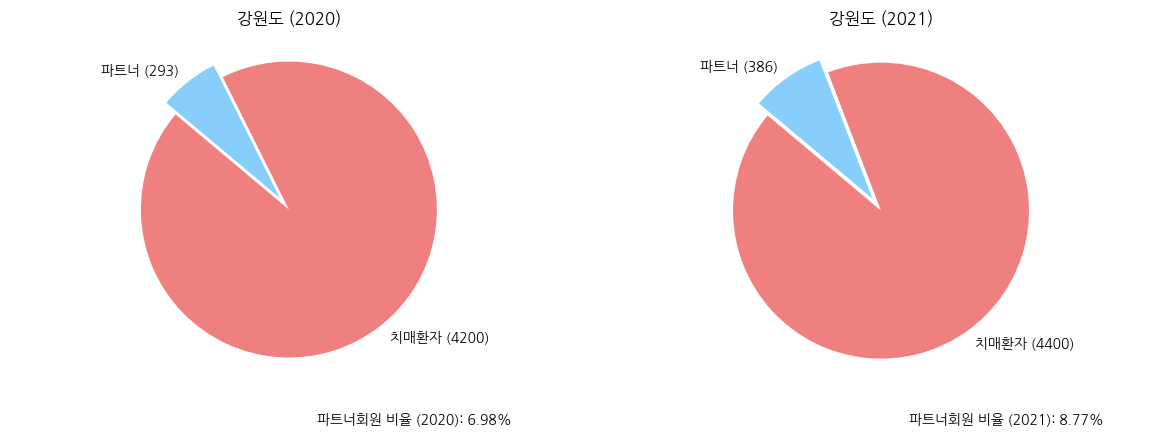

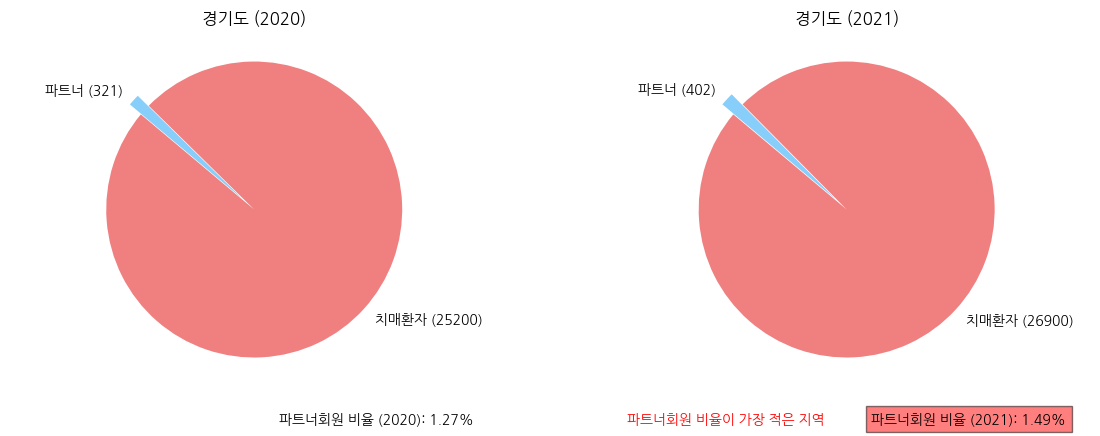

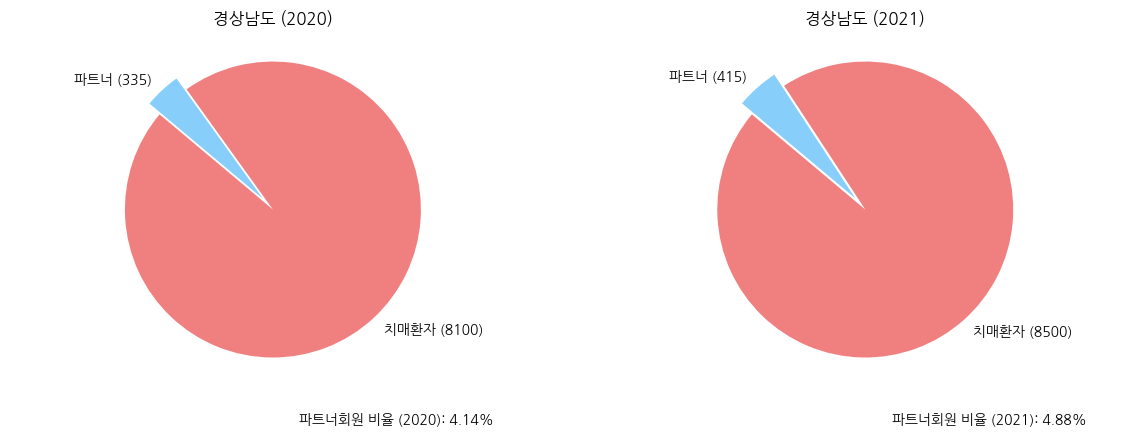

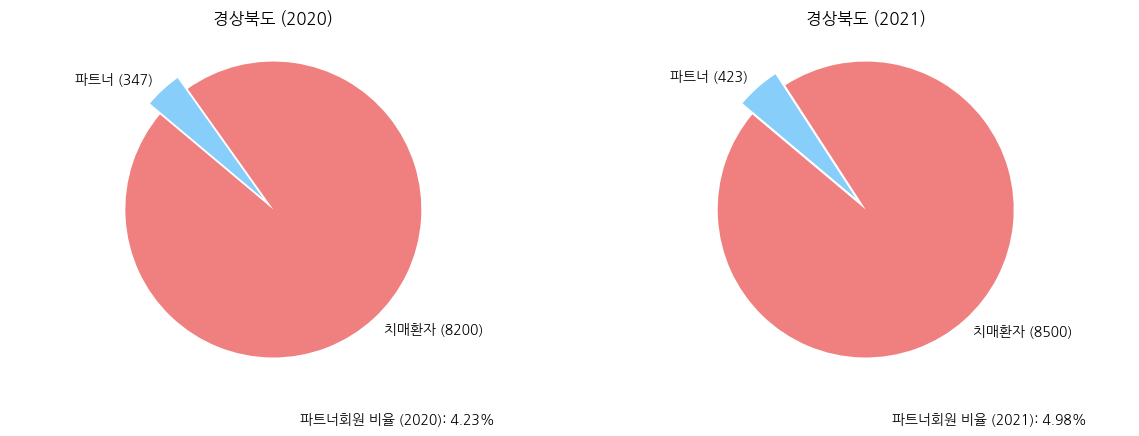

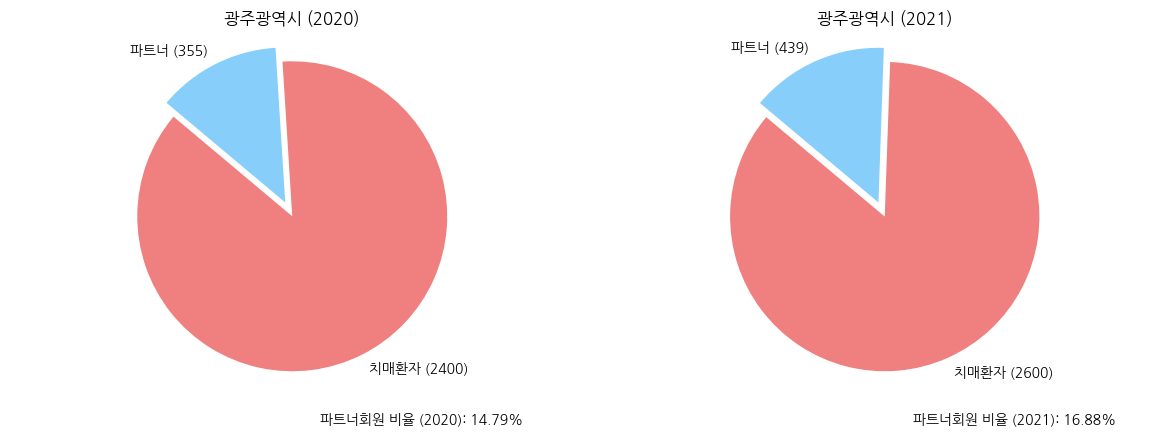

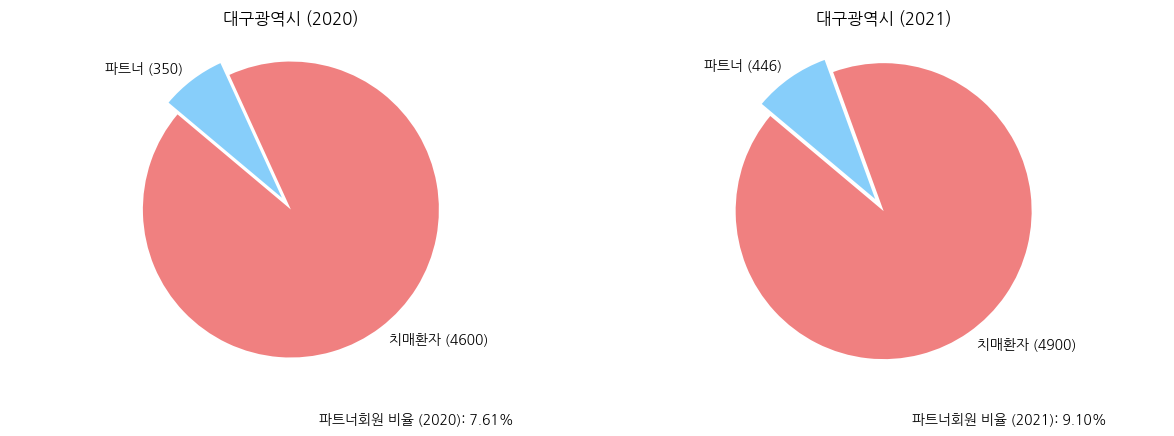

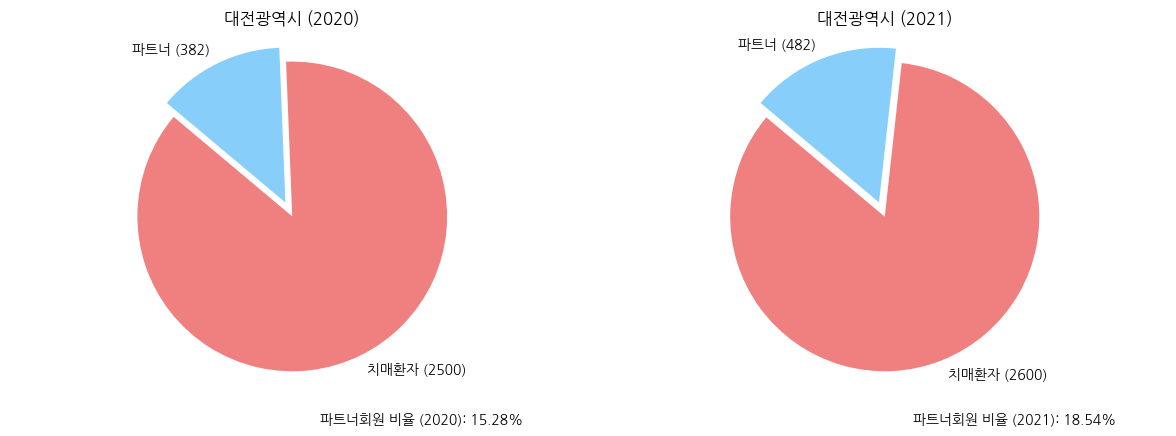

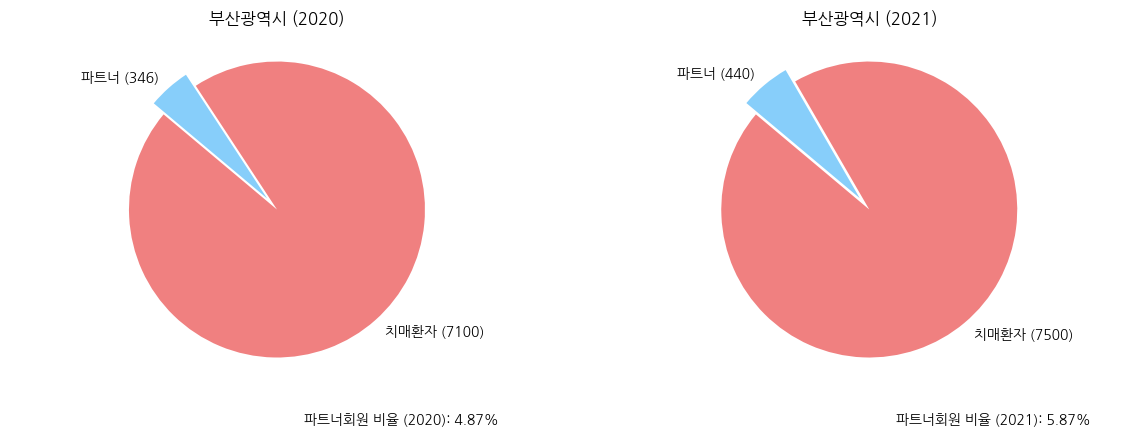

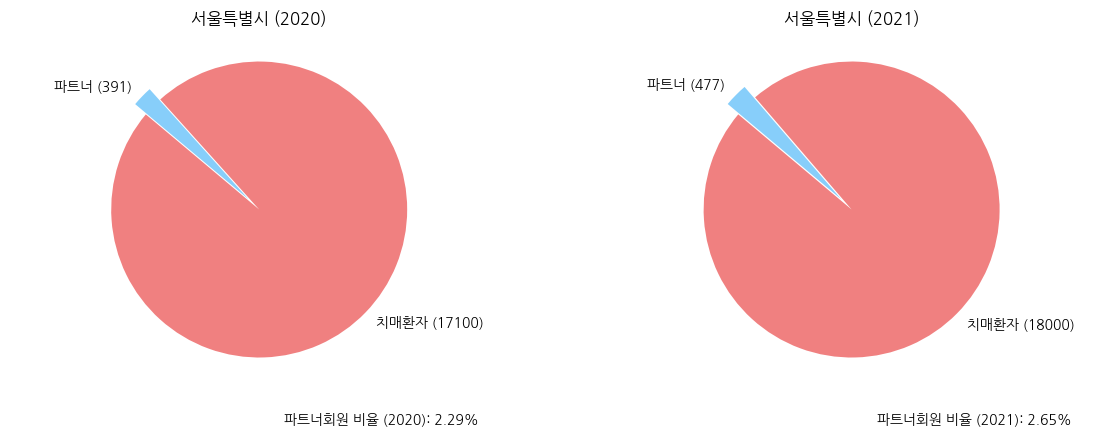

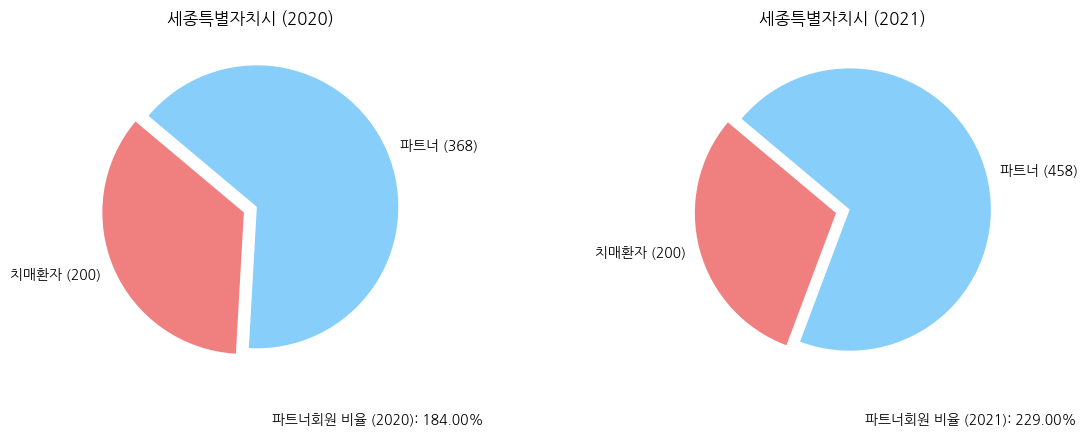

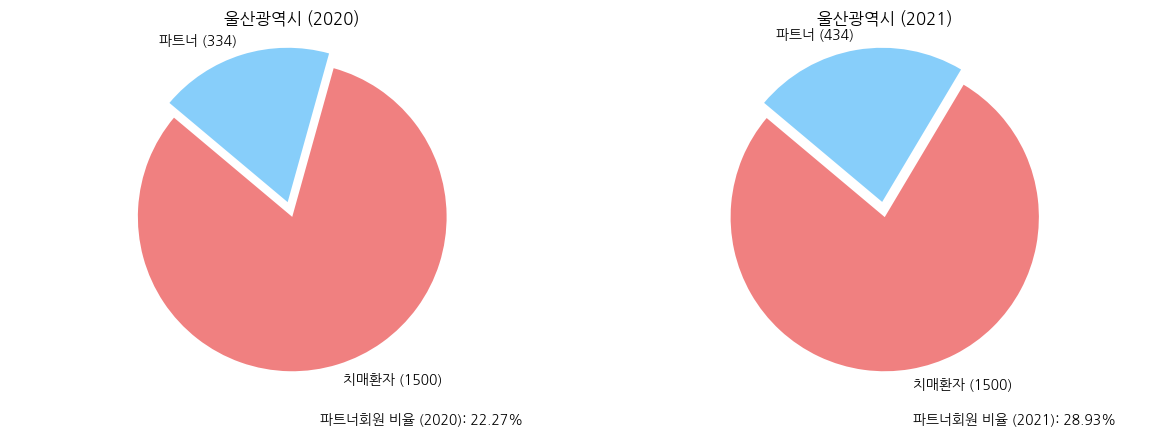

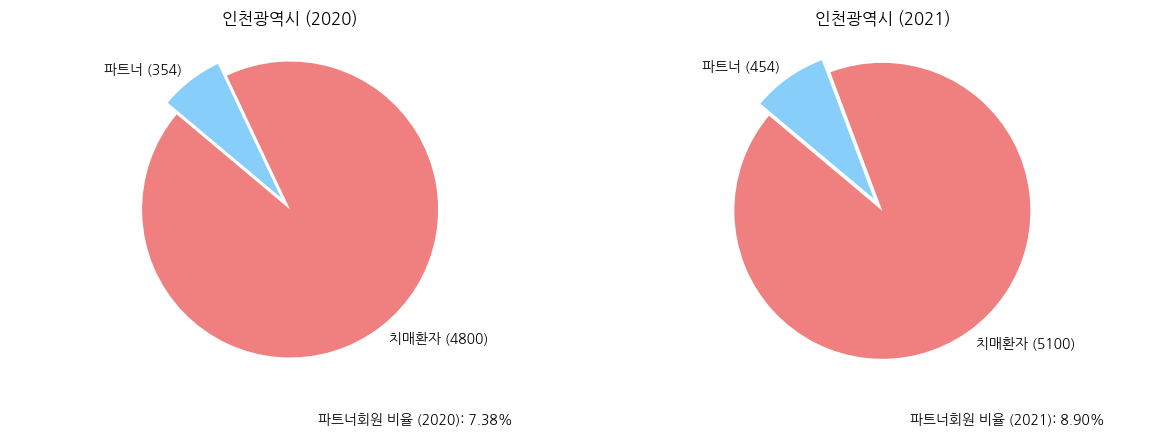

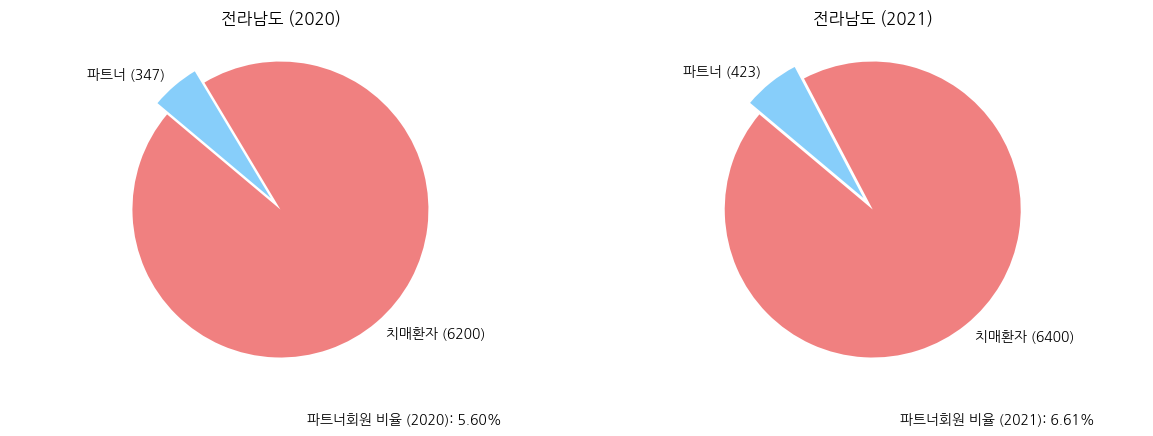

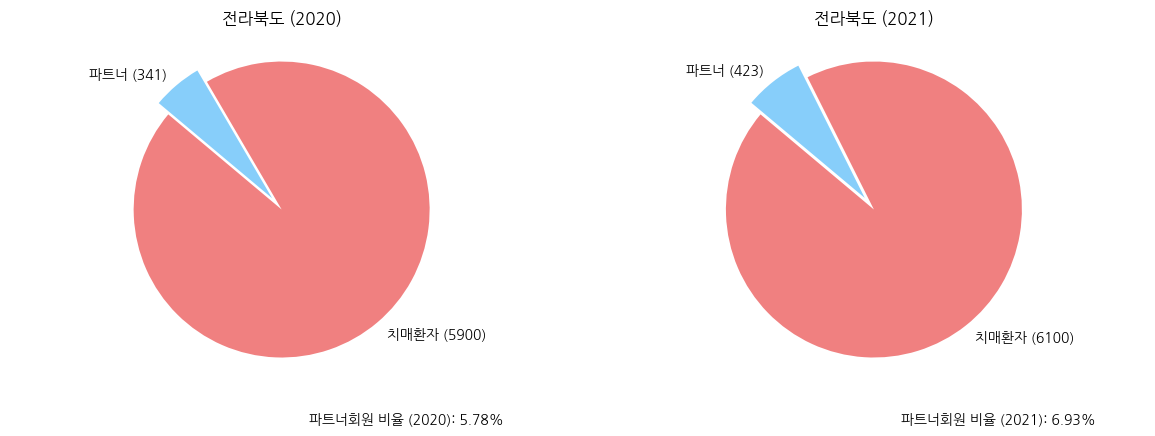

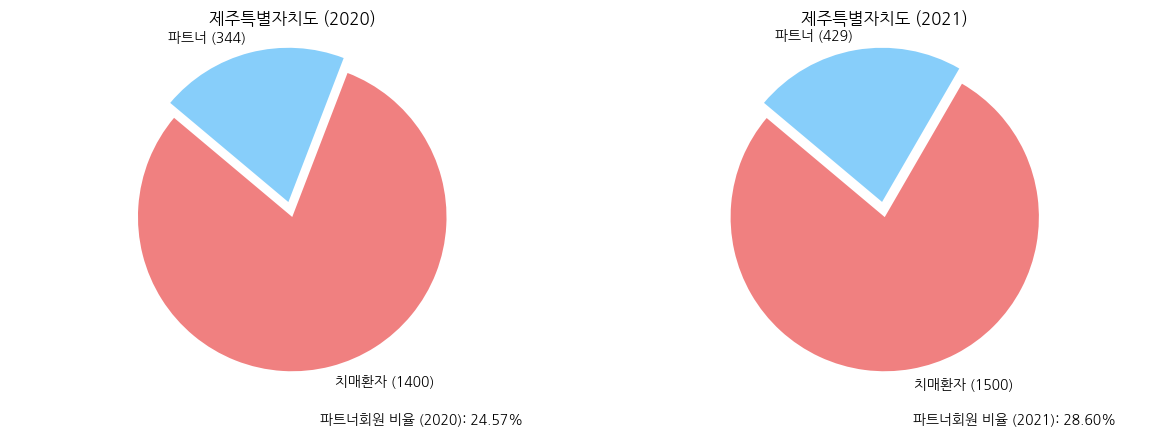

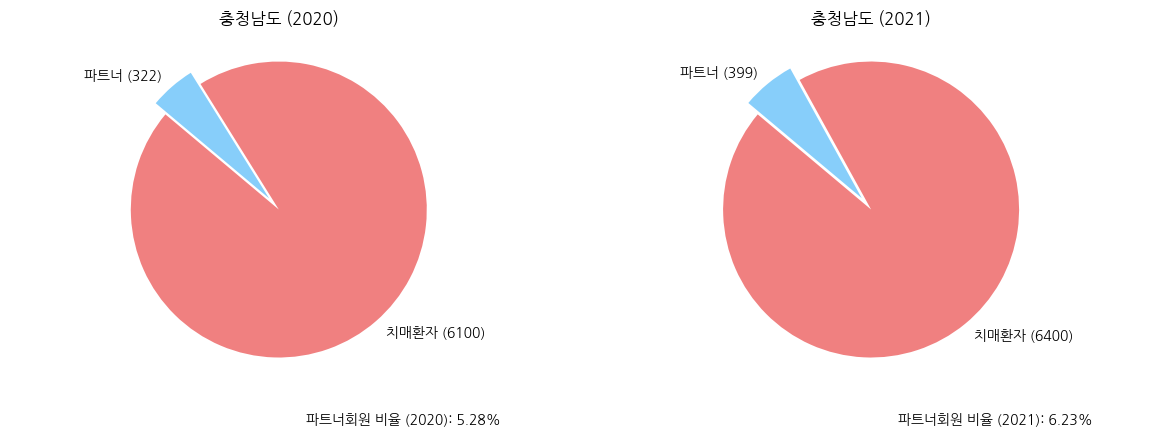

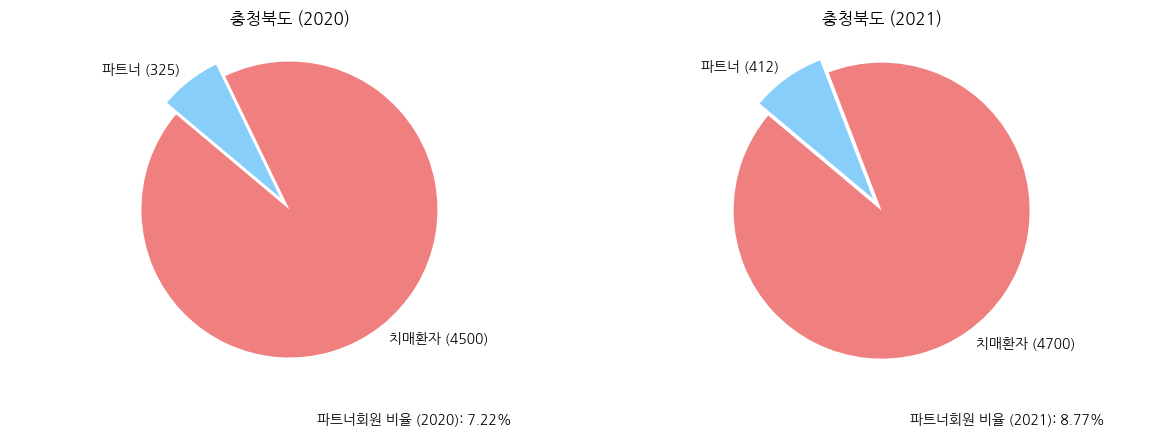

In [168]:
import matplotlib.pyplot as plt

# 최소 ratio_2021을 가지는 행정구역 계산
min_ratio_idx = merged_df['파트너_2021'] / merged_df['치매환자_2021'] * 100
min_ratio_idx = min_ratio_idx.idxmin()

# 행정구역(시도)별 데이터 반복 순회
for idx, row in merged_df.iterrows():
    plt.figure(figsize=(12, 6))  # 그래프 전체 크기 조정
    
    # 2020년 데이터
    data_2020 = [row['치매환자_2020'], row['파트너_2020']]
    labels_2020 = [f'치매환자 ({data_2020[0]})', f'파트너 ({data_2020[1]})']
    colors_2020 = ['lightcoral', 'lightskyblue']
    explode_2020 = (0.1, 0)  # 1번 데이터 조각을 떼어내기 위한 설정
    
    # 2021년 데이터
    data_2021 = [row['치매환자_2021'], row['파트너_2021']]
    labels_2021 = [f'치매환자 ({data_2021[0]})', f'파트너 ({data_2021[1]})']
    colors_2021 = ['lightcoral', 'lightskyblue']
    explode_2021 = (0.1, 0)  # 1번 데이터 조각을 떼어내기 위한 설정
    
    # 파트너회원수 비율 계산
    ratio_2020 = data_2020[1] / data_2020[0] * 100
    ratio_2021 = data_2021[1] / data_2021[0] * 100

    # 2020년 그래프 그리기
    plt.subplot(121)  # 왼쪽 그래프
    plt.title(f'{idx} (2020)')
    plt.pie(data_2020, labels=labels_2020, colors=colors_2020, autopct='', startangle=140, pctdistance=0.85, explode=explode_2020)
    plt.axis('equal')
    
    plt.text(0.55, -0.1, f'파트너회원 비율 (2020): {ratio_2020:.2f}%', transform=plt.gca().transAxes)
    
    # 2021년 그래프 그리기
    plt.subplot(122)  # 오른쪽 그래프
    plt.title(f'{idx} (2021)')
    plt.pie(data_2021, labels=labels_2021, colors=colors_2021, autopct='', startangle=140, pctdistance=0.85, explode=explode_2021)
    plt.axis('equal')
    
    
    # 간병인수 비율 (2021)을 텍스트로 표시하면서 박스로 강조
    if idx == min_ratio_idx:
        plt.text(0.05, -0.1, '파트너회원 비율이 가장 적은 지역', transform=plt.gca().transAxes, color='red')
        plt.text(0.55, -0.1, f'파트너회원 비율 (2021): {ratio_2021:.2f}%', transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.5))
    else:
        plt.text(0.55, -0.1, f'파트너회원 비율 (2021): {ratio_2021:.2f}%', transform=plt.gca().transAxes)
                 
    plt.tight_layout()
    plt.subplots_adjust(top=0.7, hspace=2)  # 제목의 위치 조정
    plt.show()

